https://www.tensorflow.org/tutorials/keras/classification?hl=fr

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist


Exploration

In [4]:
fashion_mnist

<module 'keras.datasets.fashion_mnist' from 'c:\\Users\\yousr\\Documents\\formation comp num\\ml5_deeplearning\\.venv\\Lib\\site-packages\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], shape=(60000,), dtype=uint8)

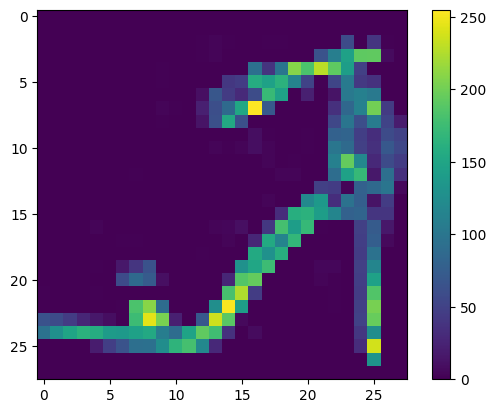

In [10]:
plt.figure()
plt.imshow(train_images[8])
plt.colorbar()
plt.grid(False)
plt.show()

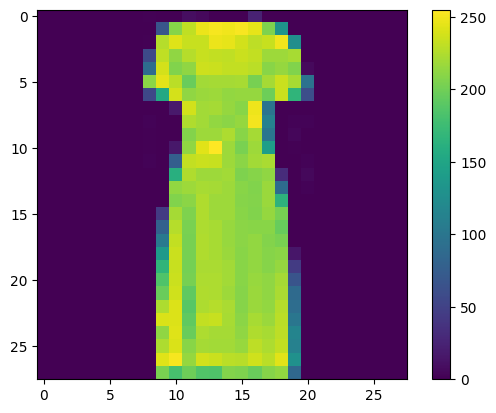

In [11]:
plt.figure()
plt.imshow(train_images[50])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

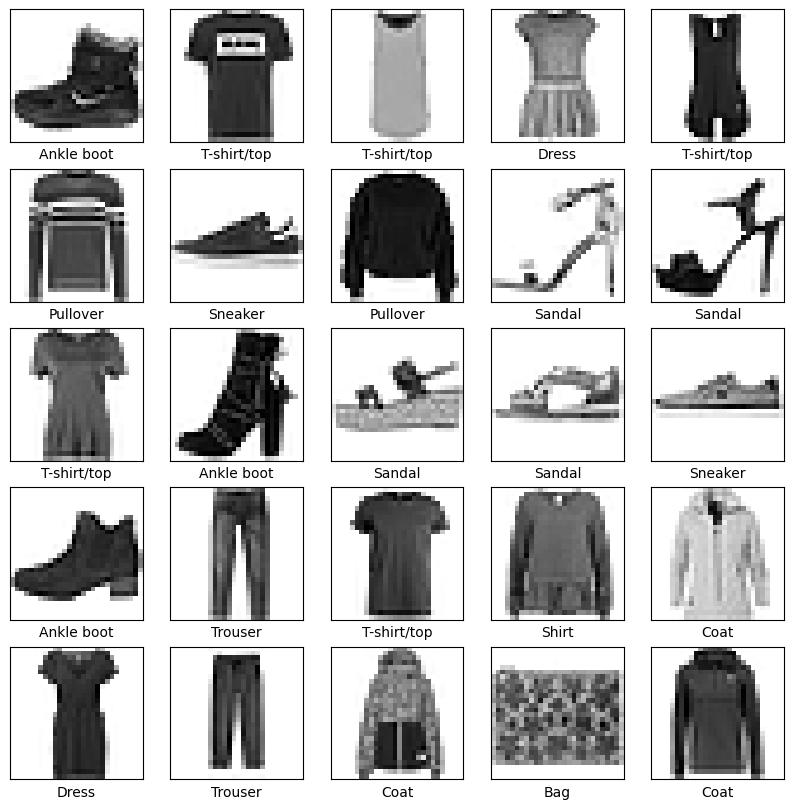

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Construire le modèle

Réseau de neurones classique (Dense)

In [14]:
model_dense = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

c:\Users\yousr\Documents\formation comp num\ml5_deeplearning\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model_dense.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [16]:
model_dense.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8239 - loss: 0.5009
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8651 - loss: 0.3757
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8779 - loss: 0.3383
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8864 - loss: 0.3108
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8918 - loss: 0.2941
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8959 - loss: 0.2807
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9000 - loss: 0.2694
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9037 - loss: 0.2573
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9080 - loss: 0.2461
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9099 - loss: 0.2379


evaluer modèle

In [17]:
test_loss, test_acc = model_dense.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8794 - loss: 0.3440

Test accuracy: 0.8794000148773193


Prédiction

Model CNN

In [18]:
model_cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])





c:\Users\yousr\Documents\formation comp num\ml5_deeplearning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [20]:

history_cnn = model_cnn.fit(train_images, train_labels, epochs=10, validation_data=(train_images, train_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.8401 - loss: 0.4402 - val_accuracy: 0.8905 - val_loss: 0.3011
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8918 - loss: 0.2968 - val_accuracy: 0.9054 - val_loss: 0.2570
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9066 - loss: 0.2526 - val_accuracy: 0.9208 - val_loss: 0.2168
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9173 - loss: 0.2210 - val_accuracy: 0.9306 - val_loss: 0.1879
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.9281 - loss: 0.1938 - val_accuracy: 0.9339 - val_loss: 0.1786
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9355 - loss: 0.1705 - val_accuracy: 0.9507 - val_loss: 0.1380
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9426 - loss: 0.1518 - val_accuracy: 0.9566 - val_loss: 0.1178
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.9502 -

In [21]:
test_loss, test_acc = model_dense.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - 2ms/step - accuracy: 0.8794 - loss: 0.3440

Test accuracy: 0.8794000148773193


Ajout droupout

In [22]:
model_dropout = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])




c:\Users\yousr\Documents\formation comp num\ml5_deeplearning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model_dropout.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])



In [24]:
history_dropout = model_dropout.fit(train_images, train_labels, epochs=10, validation_data=(train_images, train_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7997 - loss: 0.5546 - val_accuracy: 0.8680 - val_loss: 0.3467
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8640 - loss: 0.3761 - val_accuracy: 0.8924 - val_loss: 0.2880
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.8808 - loss: 0.3259 - val_accuracy: 0.8961 - val_loss: 0.2676
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 28ms/step - accuracy: 0.8928 - loss: 0.2962 - val_accuracy: 0.9128 - val_loss: 0.2331
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.8992 - loss: 0.2746 - val_accuracy: 0.9245 - val_loss: 0.2032
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9062 - loss: 0.2566 - val_accuracy: 0.9295 - val_loss: 0.1885
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 30ms/step - accuracy: 0.9128 - loss: 0.2384 - val_accuracy: 0.9321 - val_loss: 0.1834
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9173 - lo

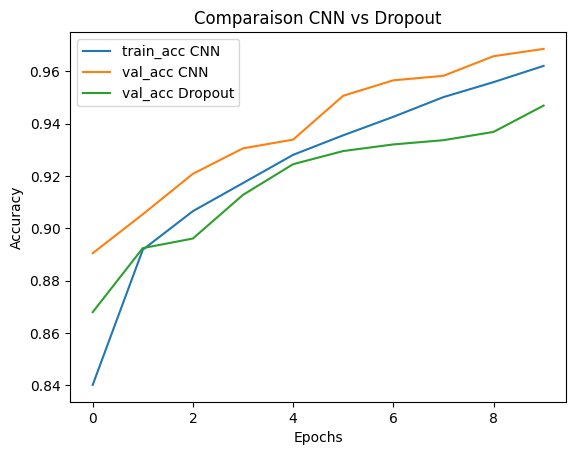

In [25]:
plt.plot(history_cnn.history['accuracy'], label='train_acc CNN')
plt.plot(history_cnn.history['val_accuracy'], label='val_acc CNN')
plt.plot(history_dropout.history['val_accuracy'], label='val_acc Dropout')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparaison CNN vs Dropout')
plt.show()
